***Most Streamed *Spotify Songs* 2023***
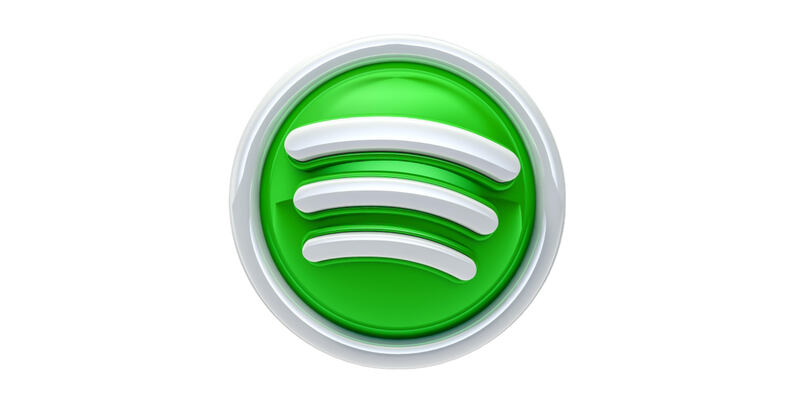

In [152]:
# Imports
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt


# Permission to access my Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

FILE_PATH = "/content/drive/MyDrive/spotify-2023.csv"

Mounted at /content/drive


# Load the data file as a dataframe

In [153]:
df = pd.read_csv(FILE_PATH)
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


#Know The data
working with features without understanding their meanings doesn't make sense and can be very wasteful in time and energy.

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

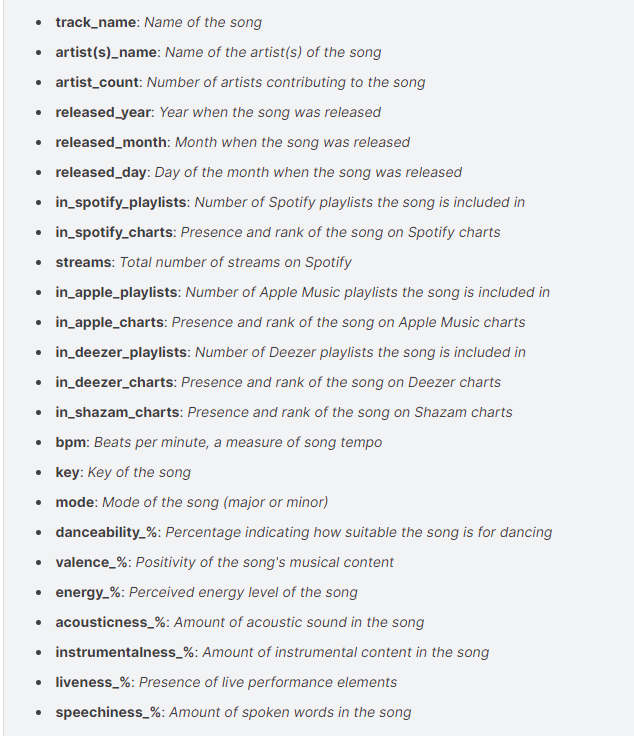

#Data Correctness
Always doubt the reliability of the data first.
It is possible that some errors were made when the data got collected.

Are there any duplicates?

In [155]:
df.duplicated().sum()

0

Are there Missing Values?

In [156]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [157]:
#Detect missing rows of any feature
missing_df = df[df.isnull().any(axis='columns')]
missing_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
12,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1316855716,300,...,118,NaN,Major,71,65,68,6,0,3,7
14,As It Was,Harry Styles,1,2022,3,31,23575,130,2513188493,403,...,174,F#,Minor,52,66,73,34,0,31,6
17,What Was I Made For? [From The Motion Picture ...,Billie Eilish,1,2023,7,13,873,104,30546883,80,...,78,NaN,Major,44,14,9,96,0,10,3
22,I Wanna Be Yours,Arctic Monkeys,1,2013,1,1,12859,110,1297026226,24,...,135,NaN,Minor,48,44,42,12,2,11,3
35,Los del Espacio,"Big One, Duki, Lit Killah, Maria Becerra, FMK,...",8,2023,6,1,1150,31,123122413,22,...,120,NaN,Major,81,63,68,11,0,11,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,After LIKE,IVE,1,2022,8,22,767,12,265548837,20,...,125,NaN,Major,68,80,92,10,0,9,12
903,B.O.T.A. (Baddest Of Them All) - Edit,"Interplanetary Criminal, Eliza Rose",2,2022,6,15,5153,6,244585109,102,...,137,NaN,Major,74,71,89,24,61,15,5
927,I Really Want to Stay at Your House,"Rosa Walton, Hallie Coggins",2,2020,12,18,668,1,140430339,0,...,125,D#,Minor,49,13,74,0,0,9,4
938,Labyrinth,Taylor Swift,1,2022,10,21,1597,0,187339835,6,...,110,NaN,Major,48,15,31,80,22,12,4


**I could use imputation techniques for the missing values ​​in the data set, but this approach can be misleading in this case. Therefore, I first need to understand the features in the data set and what they represent. This time I will choose to get rid of them so as not to "contaminate" the data set:**




In [158]:
df.dropna(inplace=True)
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


#Outliers Detection
Looking at a boxplot - the outliers are shown as circles by default, they are case values that exceeds the end of the whiskers (1.5 * IQR from the edge of the box). A simple algorithm - The IQR method is where we locate the cases that are greater than  q3+iqr∗1.5  and smaller than  q1−iqr∗1.5

In [159]:
# Lets try and locate the outliers in the data frame
# Here I look for songs with unusual bpm
fig = go.Figure()
fig.add_trace(go.Box(name='bpm', y=df.bpm, boxmean='sd'))

fig.update_traces(
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
)
fig.show()

In [160]:
def get_outliers(df, series):
  q1 = series.quantile(0.25)
  q3 = series.quantile(0.75)

  if q1*q3 == 0:
    iqr = abs(2*(q1+q3))
    toprange = iqr
    botrange = -toprange
  else:
    iqr = q3-q1
    toprange = q3 + iqr * 1.5
    botrange = q1 - iqr * 1.5

  outliers_top=df[series > toprange]
  outliers_bot= df[series < botrange]
  outliers = pd.concat([outliers_bot, outliers_top], axis=0)

  return (botrange, toprange, outliers)

Here I look for songs with unusual bpm


In [161]:
botrange, toprange, outliers = get_outliers(df, df.bpm)
print(toprange)
print(botrange)

outliers

204.0
36.0


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
100,Lover,Taylor Swift,1,2012,1,1,8448,23,882831184,160,...,206,G,Major,43,50,55,50,0,15,10


In [162]:
# lets try and locate the outliers in the data frame
fig = go.Figure()
fig.add_trace(go.Box(name='artist count', y=df.artist_count, boxmean='sd'))

fig.update_traces(
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
)
fig.show()

Here I found some unusual observations - some songs were observed that have several singers performing them, which means that it is possible that these songs are more loved than the rest

In [163]:
botrange, toprange, outliers = get_outliers(df, df.artist_count)
print(toprange)
print(botrange)

outliers

3.5
-0.5


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
137,"Tere Vaaste (From ""Zara Hatke Zara Bachke"")","Sachin-Jigar, Shadab Faridi, Altamash Faridi, ...",5,2023,5,22,182,8,54225632,3,...,110,G,Minor,76,96,72,32,0,9,4
141,Novo Balanן¿½,"Veigh, Bvga Beatz, Supernova Ent, Prod Malax",4,2023,5,19,283,7,81102253,6,...,124,D#,Minor,84,65,50,67,0,13,6
197,POLARIS - Remix,"Feid, Mora, Saiko, Quevedo",4,2023,6,8,773,33,57312735,20,...,170,G#,Minor,62,55,80,15,0,37,7
200,Annihilate (Spider-Man: Across the Spider-Vers...,"Swae Lee, Lil Wayne, Offset, Metro Boomin",4,2023,6,2,551,4,86773632,13,...,146,B,Minor,61,20,48,21,0,12,6
201,"Angel Pt 1 (feat. Jimin of BTS, JVKE & Muni Long)","Kodak Black, NLE Choppa, Muni Long, JVKE, Jimin",5,2023,5,1,577,14,133753727,22,...,74,A#,Minor,53,24,67,11,0,10,28
238,"Link Up (Metro Boomin & Don Toliver, Wizkid fe...","WizKid, Toian, Metro Boomin, Don Toliver, Beam",5,2023,6,2,197,0,32761689,3,...,101,F,Major,92,59,51,41,51,26,8
328,Marisola - Remix,"Duki, NICKI NICOLE, Cris Mj, Standly, Stars Mu...",5,2022,12,15,1845,16,223582566,20,...,95,C#,Major,77,72,87,17,0,7,5
365,Enemy (with JID) - from the series Arcane Leag...,"Imagine Dragons, League of Legends, JID, Arcane",4,2021,9,3,6180,7,1223481149,122,...,77,B,Minor,72,59,76,24,0,42,28
393,Jhoome Jo Pathaan,"Arijit Singh, Vishal Dadlani, Sukriti Kakar, V...",6,2022,12,22,138,4,1365184,13,...,105,G,Major,82,62,74,10,0,33,7
402,"Besharam Rang (From ""Pathaan"")","Vishal-Shekhar, Shilpa Rao, Caralisa Monteiro,...",6,2022,12,12,130,4,140187018,21,...,116,G#,Minor,77,65,80,6,0,15,4


I want to test my hypothesis that a song performed by many artists gets better rankings on Spotify and Apple. Therefore, I can perform a statistical analysis.

In [164]:
from scipy.stats import ttest_ind

# Define Groups (Many Artists vs. Few Artists that both of them have songs in top 10 spotify& apple charts)
many_artists = df[(df['artist_count'] > 1) & (df['in_spotify_charts'] < 10) & (df['in_apple_charts'] < 10)]
few_artists = df[(df['artist_count'] <= 1) & (df['in_spotify_charts'] < 10) & (df['in_apple_charts'] < 10)]


# Perform t-test for Spotify Ranking
t_stat_spotify, p_value_spotify = ttest_ind(many_artists['in_spotify_charts'], few_artists['in_spotify_charts'], equal_var=False)


# Perform t-test for Apple Ranking
t_stat_apple, p_value_apple = ttest_ind(many_artists['in_apple_charts'], few_artists['in_apple_charts'], equal_var=False)

# Interpret Results
alpha = 0.05  # Set significance level

if p_value_spotify < alpha:
   print("Reject null hypothesis for Spotify ranking. Many artists have a significant impact on Spotify ranking.")
else:
    print("Fail to reject null hypothesis for Spotify ranking. No significant impact of many artists.")

if p_value_apple < alpha:
    print("Reject null hypothesis for Apple ranking. Many artists have a significant impact on Apple ranking.")
else:
    print("Fail to reject null hypothesis for Apple ranking. No significant impact of many artists.")


Fail to reject null hypothesis for Spotify ranking. No significant impact of many artists.
Fail to reject null hypothesis for Apple ranking. No significant impact of many artists.


# Charts

In [165]:
df[['danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
    'instrumentalness_%', 'liveness_%', 'speechiness_%']].describe()

,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000
mean,67.391677,51.201958,64.362301,26.309670,1.676867,18.168911,10.526316
std,14.688458,23.620978,16.107587,25.470972,8.767328,13.541996,10.219987
min,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000
25%,57.000000,32.000000,53.000000,5.000000,0.000000,10.000000,4.000000
50%,70.000000,51.000000,66.000000,17.000000,0.000000,12.000000,6.000000
75%,79.000000,70.000000,76.000000,41.000000,0.000000,24.000000,12.000000
max,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [166]:
df[['danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
    'instrumentalness_%', 'liveness_%', 'speechiness_%']]

,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,80,89,83,31,0,8,4
1,71,61,74,7,0,10,4
2,51,32,53,17,0,31,6
3,55,58,72,11,0,11,15
4,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...
948,60,24,39,57,0,8,3
949,42,7,24,83,1,12,6
950,80,81,67,4,0,8,6
951,82,67,77,8,0,12,5


In [167]:
# List of columns to check
percentage_columns = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
                      'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Create a boolean mask for values greater than 100%
mask = df[percentage_columns] > 100

print("How many values are invalid?", mask.any().sum())



How many values are invalid? 0


Histograms help us understand the distribution of a single variable (in this case, BPM). This can give insights into the central tendency and spread of the feature.

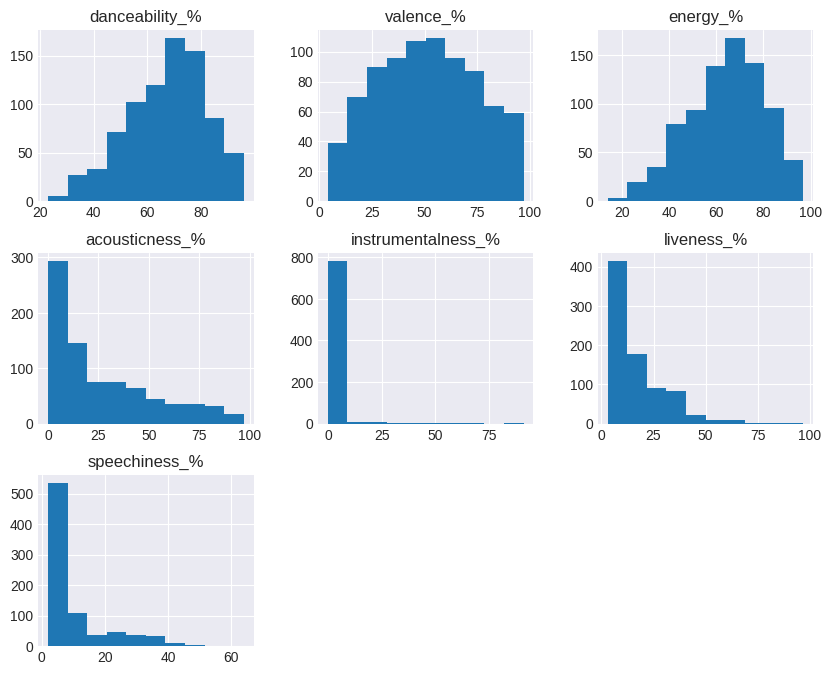

In [168]:
df[['danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
    'instrumentalness_%', 'liveness_%', 'speechiness_%']].hist(figsize=(10, 8))
plt.show()

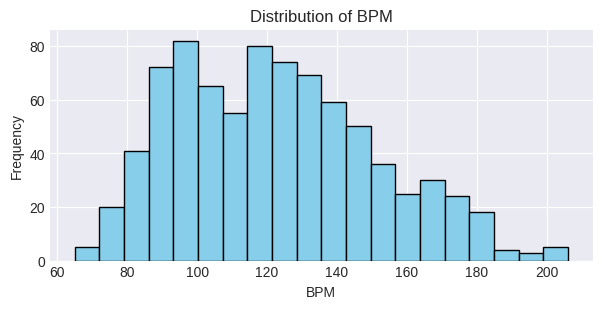

In [169]:
# Histograms
plt.figure(figsize=(7, 3))
df['bpm'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of BPM')
plt.xlabel('BPM')
plt.ylabel('Frequency')
plt.show()



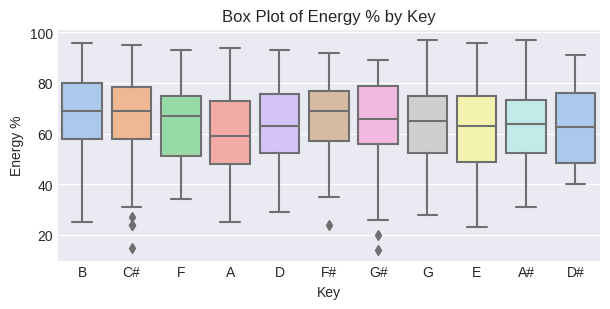

In [170]:
#Box Plots
plt.figure(figsize=(7, 3))
sns.boxplot(x='key', y='energy_%', data=df, palette='pastel')
plt.title('Box Plot of Energy % by Key')
plt.xlabel('Key')
plt.ylabel('Energy %')
plt.show()


<ipython-input-171-06d9b14a8c49>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



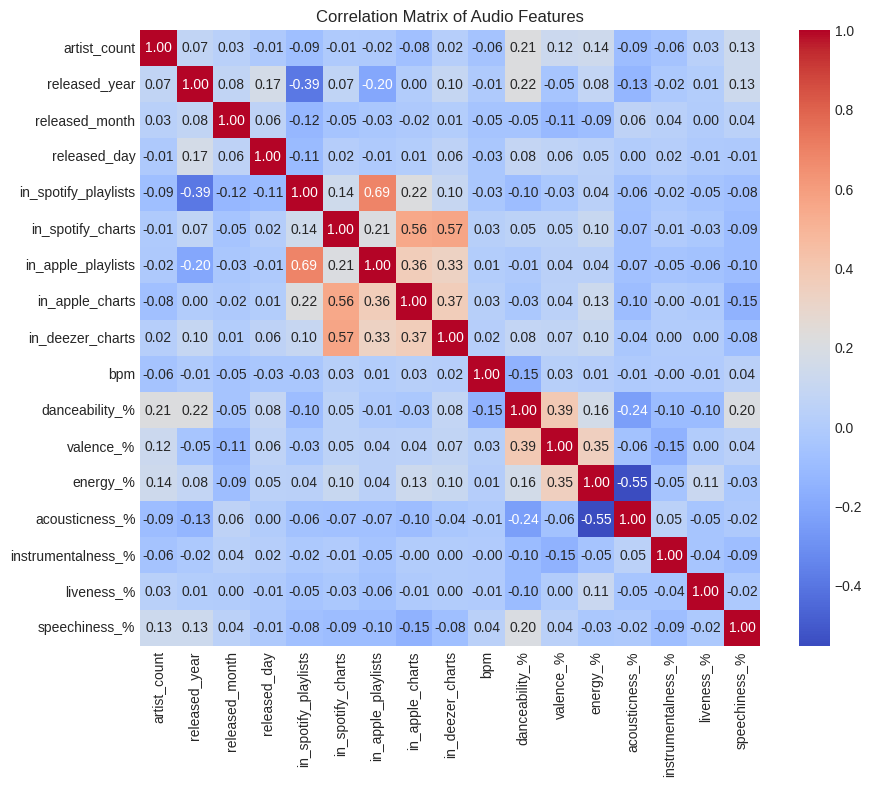

In [171]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Audio Features")
plt.show()

In [172]:
popularity_metrics = ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists',
                      'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts',
                      'streams', 'in_shazam_charts']

summary_stats = df[popularity_metrics].describe()
summary_stats

,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts
count,817.000000,817.000000,817.000000,817.000000,817.000000
mean,4849.898409,11.722154,60.161567,49.473684,2.451652
std,7741.126455,18.617668,74.923594,49.570455,5.397024
min,31.000000,0.000000,0.000000,0.000000,0.000000
25%,829.000000,0.000000,12.000000,6.000000,0.000000
50%,2040.000000,3.000000,32.000000,34.000000,0.000000
75%,4890.000000,16.000000,78.000000,84.000000,2.000000
max,52898.000000,147.000000,532.000000,275.000000,45.000000


In [173]:
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [174]:
df['in_deezer_playlists'] = df['in_deezer_playlists'].str.replace(',', '').astype(float).astype(int)
df['in_shazam_charts'] = df['in_shazam_charts'].str.replace(',', '').astype(int)

In [175]:
from scipy.stats import f_oneway

# Example for ANOVA test on 'streams' across different platforms
f_statistic, p_value = f_oneway(df['in_spotify_playlists'],
                                df['in_apple_playlists'],
                                df['in_deezer_playlists'])

if p_value < 0.05:
    print("The means are significantly different.")
else:
    print("There is no significant difference in means.")

The means are significantly different.


In [176]:
from scipy.stats import ttest_ind

# Example for t-test on 'streams' between Spotify and Apple
t_statistic, p_value = ttest_ind(df['in_spotify_playlists'],
                                df['in_apple_playlists'],)

if p_value < 0.05:
    print("The means are significantly different.")
else:
    print("There is no significant difference in means.")

The means are significantly different.


In [177]:
from scipy.stats import chi2_contingency

# Example for chi-squared test on 'in_spotify_playlists' and 'in_apple_playlists'
contingency_table = pd.crosstab(df['in_spotify_playlists'], df['in_apple_playlists'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

if p_value < 0.05:
    print("The variables are dependent.")
else:
    print("The variables are independent.")

The variables are dependent.


In [178]:
import plotly.express as px

# Select a sample of 50 songs
sample_df = df.sample(n=50, random_state=42)

# Define the platforms to compare and their colors
platforms = ['Apple', 'Spotify', 'Deezer']

sample_df = sample_df.melt(id_vars='track_name', value_vars=[f'in_{platform.lower()}_charts' for platform in platforms],
                                  var_name='Platform', value_name='Ranking')

# Create an interactive scatter plot using Plotly Express
fig = px.scatter(sample_df, x='track_name', y='Ranking', color='Platform',
                 hover_name='track_name',
                 title='Popularity Rankings Comparison Across Platforms',
                 symbol='Platform', symbol_sequence=['square']*len(platforms)
                 )

# Customize layout
fig.update_traces(marker=dict(size=8))
fig.update_layout(width=1000, height=800)
fig.update_layout(xaxis_title='Track Name', yaxis_title='Ranking')
fig.update_xaxes(tickangle=60, tickfont=dict(size=10))
# fig.update_yaxes(range=[1, 150])  # limit rankings between 1 and 150

# Show the plot
fig.show()

In [179]:
# Group by track name and count appearances
appearances = df.groupby('track_name')[['in_spotify_playlists', 'in_apple_playlists']].sum()

# Filter for songs that appeared at least once in both Spotify and Apple playlists
appeared_in_both = appearances[(appearances['in_spotify_playlists'] > 0) & (appearances['in_apple_playlists'] > 0)]
appeared_in_both


,in_spotify_playlists,in_apple_playlists
track_name,,
'Till I Collapse,22923,78
10 Things I Hate About You,1301,23
10:35,4942,190
2 Be Loved (Am I Ready),3682,41
2055,2226,29
...,...,...
we fell in love in october,6858,31
you broke me first,6638,167
‎‎‎98 Braves,282,6


In [180]:
# Get the Top 10 Songs from Spotify and Apple
top_spotify_songs = df.nlargest(10, 'in_spotify_playlists')[['track_name', 'artist(s)_name']]
top_apple_songs = df.nlargest(10, 'in_apple_playlists')[['track_name', 'artist(s)_name']]

# Extract Unique Artists
unique_artists_spotify = top_spotify_songs['artist(s)_name'].str.split(', ').explode().unique()
unique_artists_apple = top_apple_songs['artist(s)_name'].str.split(', ').explode().unique()

# Analyze Connection
common_artists = set(unique_artists_spotify) & set(unique_artists_apple)

# Print the unique artists and common artists
print("Unique Artists in Top 10 Spotify Songs:")
print(unique_artists_spotify)

print("\nUnique Artists in Top 10 Apple Songs:")
print(unique_artists_apple)

print("\nCommon Artists:")
print(common_artists)


Unique Artists in Top 10 Spotify Songs:
['Pharrell Williams' 'Nile Rodgers' 'Daft Punk' 'The Killers' 'Avicii'
 'Nirvana' 'a-ha' 'Drake' 'WizKid' 'Kyla' 'Tears For Fears'
 "Guns N' Roses" 'Rihanna' 'Calvin Harris' 'Radiohead']

Unique Artists in Top 10 Apple Songs:
['Dua Lipa' 'Justin Bieber' 'The Kid Laroi' 'Shawn Mendes'
 'Camila Cabello' 'Drake' 'WizKid' 'Kyla' 'Elton John' 'Pnau' 'SZA'
 'Doja Cat' 'Post Malone' 'Swae Lee' 'Lady Gaga' 'Bradley Cooper'
 'Ed Sheeran' 'The Chainsmokers' 'Coldplay']

Common Artists:
{'WizKid', 'Kyla', 'Drake'}


In [181]:
# Filter for top 10 Spotify songs
top_spotify_songs = df.nlargest(10, 'in_spotify_charts')

# Split artist(s)_name column and explode to get individual artists
top_spotify_songs['artist(s)_name'] = top_spotify_songs['artist(s)_name'].str.split(', ')
top_spotify_artists = top_spotify_songs.explode('artist(s)_name')

# Count the number of songs for each artist
artist_song_counts = top_spotify_artists['artist(s)_name'].value_counts()

# Print the artist and their song counts
artist_song_counts

The Weeknd        2
Latto             1
Jung Kook         1
Olivia Rodrigo    1
Dua Lipa          1
Taylor Swift      1
David Kushner     1
Dave              1
Central Cee       1
21 Savage         1
Metro Boomin      1
Madonna           1
Playboi Carti     1
Gunna             1
Bebe Rexha        1
David Guetta      1
Name: artist(s)_name, dtype: int64

In [182]:
# Split artist(s)_name column and explode to get individual artists
df['artist(s)_name'] = df['artist(s)_name'].str.split(', ')
artists_df = df.explode('artist(s)_name')

# Count the number of songs for each artist
artist_song_counts = artists_df['artist(s)_name'].value_counts()

# Print the artist and their corresponding number of songs
print(artist_song_counts)

Bad Bunny         36
Taylor Swift      32
The Weeknd        27
Kendrick Lamar    23
Feid              21
                  ..
P!nk               1
King               1
Wisin & Yandel     1
Fujii Kaze         1
Selena Gomez       1
Name: artist(s)_name, Length: 628, dtype: int64


In [184]:
# Calculate the average ranking for each artist
artist_avg_ranking = artists_df.groupby('artist(s)_name')['in_spotify_charts'].mean()

# Find the artist with the lowest average ranking
most_successful_artist = artist_avg_ranking.idxmin()

# Retrieve the songs associated with that artist
most_successful_artist_songs = artists_df[artists_df['artist(s)_name'] == most_successful_artist]['track_name']

# Print the most successful artist and their songs
print(f"The most successful artist is {most_successful_artist} with an average ranking of {artist_avg_ranking.min()}.")
print(f"Their songs are:")
print(most_successful_artist_songs)

The most successful artist is 2Pac with an average ranking of 0.0.
Their songs are:
668    California Love - Original Version (Explicit)
Name: track_name, dtype: object


Temporal trends: Identify any shifts in music attributes and preferences over time.

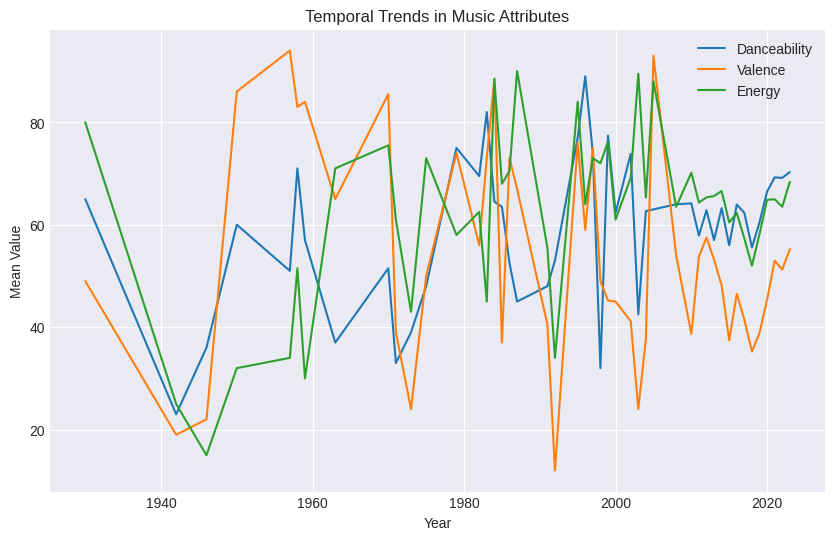

In [110]:
# Group data by year
yearly_data = df.groupby('released_year')

# Calculate aggregate statistics for music attributes
aggregate_data = yearly_data[['danceability_%', 'valence_%', 'energy_%']].mean()

# Visualize trends
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(aggregate_data.index, aggregate_data['danceability_%'], label='Danceability')
plt.plot(aggregate_data.index, aggregate_data['valence_%'], label='Valence')
plt.plot(aggregate_data.index, aggregate_data['energy_%'], label='Energy')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.title('Temporal Trends in Music Attributes')
plt.legend()

using a t-test to compare danceability between two time periods (e.g., before and after a certain year):

In [111]:
before_year_data = df[df['released_year'] < 2000]['danceability_%']
after_year_data = df[df['released_year'] >= 2000]['danceability_%']

# Perform t-test
statistic, p_value = ttest_ind(before_year_data, after_year_data)

# Set significance level
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print(f"Reject the null hypothesis. There is a significant difference in danceability between the time periods.")
else:
    print(f"Fail to reject the null hypothesis. There is no significant difference in danceability between the time periods.")

Reject the null hypothesis. There is a significant difference in danceability between the time periods.


In [112]:
from scipy.stats import chi2_contingency

# Assuming 'df' is your DataFrame with categorical attributes
contingency_table = pd.crosstab(df['key'], df['released_year'])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Interpret the results
if p_value < alpha:
    print(f"Reject the null hypothesis. There is a significant association between key and released year.")
else:
    print(f"Fail to reject the null hypothesis. There is no significant association between key and released year.")

Fail to reject the null hypothesis. There is no significant association between key and released year.
